#  Keras 学习

##  一、Regressor 回归





用 Keras 构建回归神经网络的步骤：
- 导入模块并创建数据
- 建立模型
- 激活模型
- 训练模型
- 检验模型
- 可视化结果

### 1.1  导入数据
models.Sequential，用来一层一层一层的去建立神经层； layers.Dense 意思是这个神经层是全连接层。

Using TensorFlow backend.


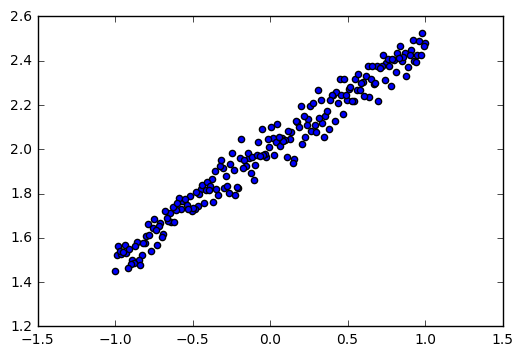

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]     # train 前 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 后 40 data points

### 1.2 建立模型
然后用 Sequential 建立 model， 再用 model.add 添加神经层，添加的是 Dense 全连接神经层。

参数有两个，一个是输入数据和输出数据的维度，本代码的例子中 x 和 y 是一维的。

如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入。在这个例子里，只需要一层就够了。

In [5]:
# model = Sequential()
# model.add(Dense(32, input_shape=(500,)))
# model.add(Dense(10, activation='softmax'))
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

### 1.3  激活模型
接下来要激活神经网络，上一步只是定义模型。

参数中，误差函数用的是 mse 均方误差；优化器用的是 sgd 随机梯度下降法。

In [6]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

In [12]:
model.get_weights()

[array([[ 0.34560496]], dtype=float32), array([ 1.99641228], dtype=float32)]

### 1.4 训练模型
训练的时候用 model.train_on_batch 一批一批的训练 X_train, Y_train。默认的返回值是 cost，每100步输出一下结果。

In [8]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

"""
Training -----------
train cost:  4.111329555511475
train cost:  0.08777070790529251
train cost:  0.007415373809635639
train cost:  0.003544030711054802
"""

Training -----------
('train cost: ', 4.3721724)
('train cost: ', 0.1854454)
('train cost: ', 0.032795031)
('train cost: ', 0.010005154)


'\nTraining -----------\ntrain cost:  4.111329555511475\ntrain cost:  0.08777070790529251\ntrain cost:  0.007415373809635639\ntrain cost:  0.003544030711054802\n'

### 1.5 检验模型
用到的函数是 model.evaluate，输入测试集的x和y， 输出 cost，weights 和 biases。其中 weights 和 biases 是取在模型的第一层 model.layers[0] 学习到的参数。从学习到的结果你可以看到, weights 比较接近0.5，bias 接近 2。

In [9]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

"""
Testing ------------
40/40 [==============================] - 0s
test cost: 0.004269329831
Weights= [[ 0.54246825]] 
biases= [ 2.00056005]
"""


Testing ------------
40/40 [==============================] - 0s
('test cost:', 0.0090687219053506851)
('Weights=', array([[ 0.34560496]], dtype=float32), '\nbiases=', array([ 1.99641228], dtype=float32))


'\nTesting ------------\n40/40 [==============================] - 0s\ntest cost: 0.004269329831\nWeights= [[ 0.54246825]] \nbiases= [ 2.00056005]\n'

### 1.6  可视化

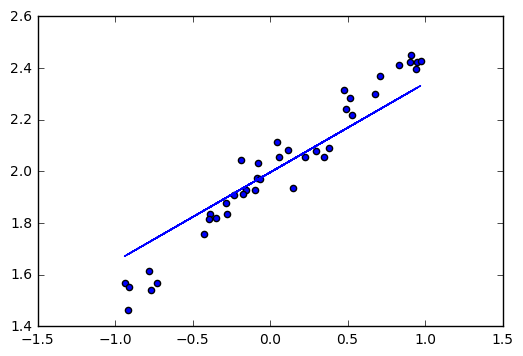

In [10]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

##   二、Classifier 分类


用 Keras 构建分类神经网络的步骤：

- 数据预处理
- 建立神经网络
- 训练网络
- 测试模型

### 2.1  数据预处理

In [41]:
from keras.datasets import mnist
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, nb_classes=10)
y_test = np_utils.to_categorical(y_test, nb_classes=10)

### 2.2  建立神经网络

相关的包

- models.Sequential，用来一层一层一层的去建立神经层；
- yers.Dense 意思是这个神经层是全连接层。
- yers.Activation 激励函数。
- timizers.RMSprop 优化器采用 RMSprop，加速神经网络训练方法。

In [42]:
# Another way to build your neural net
model=Sequential([Dense(32,input_dim=784),Activation('relu'),Dense(10),Activation('softmax')])
# 接下来用 RMSprop 作为优化器，它的参数包括学习率等，可以通过修改这些参数来看一下模型的效果。
# Another way to define your optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

### 2.3  激活模型

In [43]:
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy','precision'])

### 2.4  训练模型

In [44]:
model.fit(X_train,y_train,nb_epoch=5,batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.3506 - acc: 0.9000 - precision: 0.9316     
Epoch 2/5
60000/60000 [==============================] - 6s - loss: 0.1988 - acc: 0.9427 - precision: 0.9537     
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 0.1620 - acc: 0.9532 - precision: 0.9606     
Epoch 4/5
60000/60000 [==============================] - 7s - loss: 0.1404 - acc: 0.9588 - precision: 0.9657     
Epoch 5/5
60000/60000 [==============================] - 7s - loss: 0.1262 - acc: 0.9639 - precision: 0.9690     


### 2.5 测试模型

In [45]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

# print('test loss: ', loss)
# print('test accuracy: ', accuracy)


Testing ------------
 9696/10000 [============================>.] - ETA: 0s

ValueError: too many values to unpack